## Credit Risk Modeling

This competition concerns loan data. When a customer applies for a loan, banks and other credit providers use statistical models to determine whether or not to grant the loan based on the likelihood of the loan being repaid. The factors involved in determining this likelihood are complex, and extensive statistical analysis and modeling are required to predict the outcome for each individual case. You must implement a model that predicts loan repayment or default based on the data provided. The dataset used in this competition consists of synthetic data that was generated specifically for use in this project. The data is designed to exhibit similar characteristics to genuine loan data.

#### Description
In this competition, you must explore and cleanse a dataset consisting of over 111,000 loan records to determine the best way to predict whether a loan applicant will fully repay or default on a loan. You must then build a machine learning model that returns the unique loan ID and a loan status label that indicates whether the loan will be fully paid or charged off.

### The dataset consists of the following fields:
• Loan ID: A unique Identifier for the loan information.
    
• Customer ID: A unique identifier for the customer. Customers may have more than one loan.
    
• Loan Status: A categorical variable indicating if the loan was paid back or defaulted.
    
• Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.
    
• Term: A categorical variable indicating if it is a short term or long term loan.
    
• Credit Score: A value between 0 and 800 indicating the riskiness of the borrower’s credit history.
    
• Years in current job: A categorical variable indicating how many years the customer has been in their current job.
    
• Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage
    
• Annual Income: The customer's annual income.
    
• Purpose: A description of the purpose of the loan.

• Monthly Debt: The customer's monthly payment for their existing loans.
    
• Years of Credit History: The years since the first entry in the customer’s credit history.
    
• Months since last delinquent: Months since the last loan delinquent payment.
    
• Number of Open Accounts: The total number of open credit cards.
    
• Number of Credit Problems: The number of credit problems in the customer records.
    
• Current Credit Balance: The current total debt for the customer.
    
• Maximum Open Credit: The maximum credit limit for all credit sources.
    
• Bankruptcies: The number of bankruptcies.
    
• Tax Liens: The number of tax liens.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data=pd.read_csv("LoansTrainingSetV2.csv")

#### Feature Selection

In [3]:
#Getting the data columns
print(len(loan_data.columns))
print(loan_data.columns)
print(len(loan_data))

19
Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')
111107


* So we have 19 columns and 111107 rows.
* Now lets check for each variable and stat cleaning it.

### Check for NULL Values in Columns

Credit Score                    0.192049
Years in current job            0.042239
Annual Income                   0.192049
Months since last delinquent    0.531047
Bankruptcies                    0.002052
Tax Liens                       0.000099
dtype: float64


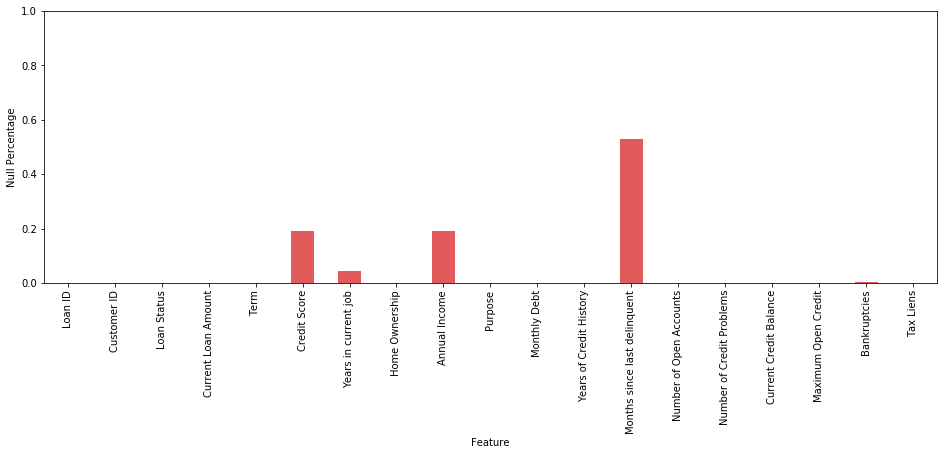

In [4]:
percentage_missing_data = loan_data.isnull().sum()/ len(loan_data)
print(percentage_missing_data[percentage_missing_data>0])
axis = percentage_missing_data.plot(kind="bar", color="#E35A5C", figsize=(16,5))
axis.set_xlabel("Feature")
axis.set_ylabel("Null Percentage")
axis.set_ylim(0,1)
plt.show()

## Checking Each Variable Individually.

### Load ID

* The Loan.ID is a unique identifier, so we will remove any duplicate values of that.
* It is a character variable and need not be converted to factor.

In [5]:
loan_data.drop_duplicates(subset='Loan ID',inplace=True)
len(loan_data)

88910

* Now rows have reduced to 88910

### Customer ID

* It is a character vector, and doesn't requires any cleaning

In [6]:
loan_data['Customer ID'].head(3)

0    7c202b37-2add-44e8-9aea-d5b119aea935
1    e7217b0a-07ac-47dd-b379-577b5a35b7c6
2    0a62fc41-16c8-40b5-92ff-9e4b763ce714
Name: Customer ID, dtype: object

### Loan.Status

* It is our Dependent Variable and in python dependent varible is not converted to factor or dummies.

In [7]:
loan_data['Loan Status'].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

### Current.Loan.Amount

In [8]:
loan_data['Current Loan Amount'].head(3)

0    12232
1    25014
2    16117
Name: Current Loan Amount, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x201124d17b8>,
 'caps': [<matplotlib.lines.Line2D at 0x201124d1e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x201124d1668>],
 'medians': [<matplotlib.lines.Line2D at 0x201124c5550>],
 'fliers': [<matplotlib.lines.Line2D at 0x201124c5898>],
 'means': []}

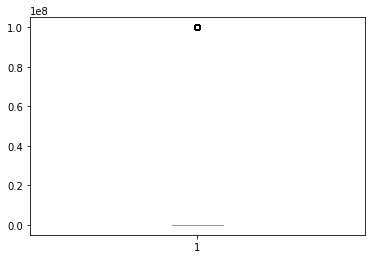

In [9]:
plt.boxplot(loan_data['Current Loan Amount'])

In [10]:
loan_data['Current Loan Amount'].describe()

count    8.891000e+04
mean     1.433878e+07
std      3.502996e+07
min      4.910000e+02
25%      8.283000e+03
50%      1.435500e+04
75%      2.448500e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [11]:
IQR=2.448500e+04-8.283000e+03
IQR=IQR*1.5
high=2.448500e+04+IQR
low=8.283000e+03-IQR
high,low

(48788.0, -16020.0)

In [12]:
len(loan_data[loan_data['Current Loan Amount']<low])

0

In [13]:
len(loan_data[loan_data['Current Loan Amount']>high])

12738

* There are 12783 values that are outliers.
* Replacing all with NA

In [14]:
loan_data.loc[loan_data['Current Loan Amount']>high,'Current Loan Amount']=None

### Term

* It is a character vector. Needs to be converted to factor.
* It has two levels, "Long Term" and "Short Term". Cleaning not required

In [15]:
loan_data['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [16]:
Dummies=['Term']

### Credit.Score

In [17]:
loan_data['Credit Score'].unique()

array([7280., 7330., 7240., 7400., 6860., 7420., 6630., 7360., 6720.,
       7010., 7310., 6850., 6280., 7470., 7200., 7320., 6820., 7230.,
       6740., 7350., 7430., 7170., 7370., 7180., 7440., 6680., 7130.,
       6510., 6970., 6950., 6410., 6610., 7160., 7260., 7290., 6620.,
       7480., 6830., 7080., 7380., 6320., 7490., 7140., 7340., 6710.,
       7040., 7500., 6880., 6990., 6590., 6110., 6300., 6520., 6450.,
       7460., 6100., 7060., 6780., 7020., 7090., 6840., 6600., 6220.,
       6800., 6920., 7000., 7050., 7390., 6770., 6810., 7120., 6750.,
       6910., 6930., 6570., 6870., 7220., 6480., 7070., 6290., 6660.,
       6980., 6260., 6390., 7210., 7450., 7250., 6640., 7410., 6140.,
       6560., 6760., 6730., 7100., 7190., 6890., 7300., 6900., 6960.,
       7030., 7510., 6940., 7150., 6700., 6530., 6270., 7110., 6440.,
       6420., 6010., 6350., 6670., 5930., 6790., 6490., 7270., 5890.,
       6180., 6690., 6330., 6380., 6230., 6650., 6210., 6580., 6060.,
       6130., 6080.,

* It has many values greater than 800 , divide those by 10 to bring all values to scale 800:10

In [18]:
loan_data['Credit Score'] = loan_data['Credit Score'].apply(lambda x : x/10 if (x>800) else x)

* Missing value treatment, replacing missing values by median

In [19]:
loan_data['Credit Score'].median(skipna=True)

730.0

In [20]:
loan_data['Credit Score'] = loan_data['Credit Score'].replace(np.nan, loan_data['Credit Score'].median())

### Years.in.current.job

* Needs to be converted to factor

In [21]:
loan_data['Years in current job'].unique()

array(['< 1 year', '10+ years', '9 years', '3 years', '2 years',
       '7 years', '6 years', '1 year', '5 years', '4 years', '8 years',
       nan], dtype=object)

In [22]:
Dummies.append("Years in current job")
Dummies

['Term', 'Years in current job']

### Home.Ownership 

In [23]:
loan_data['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

* Convert HaveMortgage to Home Mortage.
* Needs to be converted to factor.

In [24]:
loan_data['Home Ownership'] = loan_data['Home Ownership'].replace('HaveMortgage','Home Mortgage')

In [25]:
loan_data['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home'], dtype=object)

In [26]:
Dummies.append("Home Ownership")
Dummies

['Term', 'Years in current job', 'Home Ownership']

### Annual.Income

In [27]:
loan_data['Annual Income'].describe()

count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

* Outliers are in the top 1 % data only.
* Capping any values greater than 99% to 99th value.

In [28]:
loan_data['Annual Income'].quantile([.99, .995, 1])

0.990     239286.96
0.995     296831.02
1.000    8713547.00
Name: Annual Income, dtype: float64

In [29]:
CapValue=loan_data['Annual Income'].quantile(.99)
print('Replacing all values above 99th percentile with : ',CapValue)
loan_data['Annual Income'] = loan_data['Annual Income'].apply(lambda x : CapValue  if (x>CapValue) else x)

Replacing all values above 99th percentile with :  239286.95999999985


* Converting to log scale

In [30]:
loan_data['Annual Income']=np.log(loan_data['Annual Income'])

### Purpose

In [31]:
loan_data['Purpose'].unique()

array(['Debt Consolidation', 'Home Improvements', 'other',
       'Business Loan', 'small_business', 'Other', 'moving', 'Buy a Car',
       'Medical Bills', 'Buy House', 'Take a Trip', 'vacation',
       'major_purchase', 'Educational Expenses', 'wedding',
       'renewable_energy'], dtype=object)

* Merge Other and other as Other

In [32]:
loan_data['Purpose'] = loan_data['Purpose'].replace('other','Other')

In [33]:
Dummies.append("Purpose")
Dummies

['Term', 'Years in current job', 'Home Ownership', 'Purpose']

### Monthly.Debt

* It's a character vector, but needs to be converted to numeric.
* It has $ sign and "," which needs to be replaced with "".
* Need to convert to numeric

In [34]:
loan_data['Monthly Debt'] = loan_data['Monthly Debt'].apply(lambda x : str(x).replace('$',''))
loan_data['Monthly Debt'] = loan_data['Monthly Debt'].apply(lambda x : str(x).replace(',',''))

In [35]:
loan_data['Monthly Debt'] = pd.to_numeric(loan_data['Monthly Debt'], errors ='coerce')

* Check for Outliers.

* Outliers are from 99 to 100. Let's dig deeper.

In [36]:
loan_data['Monthly Debt'].quantile([.95,0.99,1])

0.95     2115.511
0.99     3087.111
1.00    22939.120
Name: Monthly Debt, dtype: float64

* Outliers are in the top 1 % data only.
* Capping any values greater than 99% to 99th value.

In [37]:
CapValue=loan_data['Monthly Debt'].quantile(.99)
print('Replacing all values above 99th percentile with : ',CapValue)
loan_data['Monthly Debt'] = loan_data['Monthly Debt'].apply(lambda x : CapValue  if (x>CapValue) else x)

Replacing all values above 99th percentile with :  3087.1110000000003


### Years.of.Credit.History

In [38]:
loan_data['Years of Credit History'].describe()

count    88910.000000
mean        18.315313
std          7.049175
min          3.600000
25%         13.500000
50%         17.000000
75%         21.800000
max         70.500000
Name: Years of Credit History, dtype: float64

* Numeric vector , looks clean , No need of any processing.

### Months.since.last.delinquent

In [39]:
loan_data['Months since last delinquent'].describe()

count    40404.000000
mean        35.080289
std         22.008583
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

* Has lots of NA's. around 54%.

In [40]:
loan_data['Months since last delinquent'].isnull().sum()/ len(loan_data)

0.5455629288044089

### Number.of.Open.Accounts

* It is a numeric vector

In [41]:
loan_data['Number of Open Accounts'].describe()

count    88910.000000
mean        11.110348
std          4.978461
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: Number of Open Accounts, dtype: float64

* Checking for outliers

In [42]:
loan_data['Number of Open Accounts'].quantile([.99,1])

0.99    26.0
1.00    76.0
Name: Number of Open Accounts, dtype: float64

* Outliers are in the top 1 % data only.
* Capping any values greater than 99% to 99th value.

In [43]:
CapValue=loan_data['Number of Open Accounts'].quantile(.99)
print('Replacing all values above 99th percentile with : ',CapValue)
loan_data['Number of Open Accounts'] = loan_data['Number of Open Accounts'].apply(lambda x : CapValue  if (x>CapValue) else x)

Replacing all values above 99th percentile with :  26.0


### Number.of.Credit.Problems

In [44]:
loan_data['Number of Credit Problems'].describe()

count    88910.000000
mean         0.160477
std          0.473746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Number of Credit Problems, dtype: float64

* It is a numeric vector , cleaning not required.

### Current.Credit.Balance

* It is a numeric vector , No NAs.

In [45]:
loan_data['Current Credit Balance'].describe()

count    8.891000e+04
mean     1.543593e+04
std      1.965873e+04
min      0.000000e+00
25%      5.949000e+03
50%      1.103900e+04
75%      1.930100e+04
max      1.730472e+06
Name: Current Credit Balance, dtype: float64

In [46]:
loan_data['Current Credit Balance'].quantile([.99,0.999,1])

0.990      81007.190
0.999     227670.033
1.000    1730472.000
Name: Current Credit Balance, dtype: float64

* Outliers are in the top 1 % data only.
* Capping any values greater than 99% to 99th value

In [47]:
CapValue=loan_data['Current Credit Balance'].quantile(.99)
print('Replacing all values above 99th percentile with : ',CapValue)
loan_data['Current Credit Balance'] = loan_data['Current Credit Balance'].apply(lambda x : CapValue  if (x>CapValue) else x)

Replacing all values above 99th percentile with :  81007.19000000003


* Taking sqrt to make it normal.

In [48]:
loan_data['Current Credit Balance']=np.sqrt(loan_data['Current Credit Balance'])

### Maximum.Open.Credit

In [49]:
loan_data['Maximum Open Credit'].unique()

array(['7946', '77961', '14815', ..., 32766, 53374, 21124], dtype=object)

* It's a character vector,but has numeric values.
* It has some junk values such as "#VALUE!", which needs to be replaced with NA

In [50]:
loan_data['Maximum Open Credit'] = loan_data['Maximum Open Credit'].replace('#VALUE!',None)

* Converting to numeric data.

In [51]:
loan_data['Maximum Open Credit'] = pd.to_numeric(loan_data['Maximum Open Credit'], errors ='coerce')

* Checking for Outliers

In [52]:
loan_data['Maximum Open Credit'].describe()

count    8.891000e+04
mean     3.596487e+04
std      4.041760e+05
min      0.000000e+00
25%      1.277500e+04
50%      2.178100e+04
75%      3.636700e+04
max      6.998809e+07
Name: Maximum Open Credit, dtype: float64

In [53]:
loan_data['Maximum Open Credit'].quantile([0.95,0.975,0.99,1])

0.950    7.660080e+04
0.975    1.036726e+05
0.990    1.714239e+05
1.000    6.998809e+07
Name: Maximum Open Credit, dtype: float64

* Capping beyond 150000

In [54]:
loan_data['Maximum Open Credit'] = loan_data['Maximum Open Credit'].apply(lambda x : 150000  if (x>150000) else x)

* Replacing NA's by median.

In [55]:
loan_data['Maximum Open Credit'] = loan_data['Maximum Open Credit'].replace(np.nan, loan_data['Maximum Open Credit'].median())

* Taking sqrt to make it more normal

In [56]:
loan_data['Maximum Open Credit']=np.sqrt(loan_data['Maximum Open Credit'])

### Bankruptcies

In [57]:
loan_data['Bankruptcies'].describe()

count    88718.000000
mean         0.112672
std          0.343300
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Bankruptcies, dtype: float64

In [58]:
loan_data['Bankruptcies'].isnull().sum()/ len(loan_data)

0.0021594871218085705

* It has very few NAs , replace them with median.

In [59]:
loan_data['Bankruptcies'].median()

0.0

In [60]:
loan_data['Bankruptcies'] = loan_data['Bankruptcies'].replace(np.nan, loan_data['Bankruptcies'].median())

### Tax.Liens

In [61]:
loan_data['Tax Liens'].describe()

count    88902.000000
mean         0.028222
std          0.257533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Tax Liens, dtype: float64

In [62]:
loan_data['Tax Liens'] = loan_data['Tax Liens'].replace(np.nan, loan_data['Tax Liens'].median())

## Check for Remaining NULL Values.

Current Loan Amount             0.143268
Years in current job            0.042931
Annual Income                   0.239996
Months since last delinquent    0.545563
dtype: float64


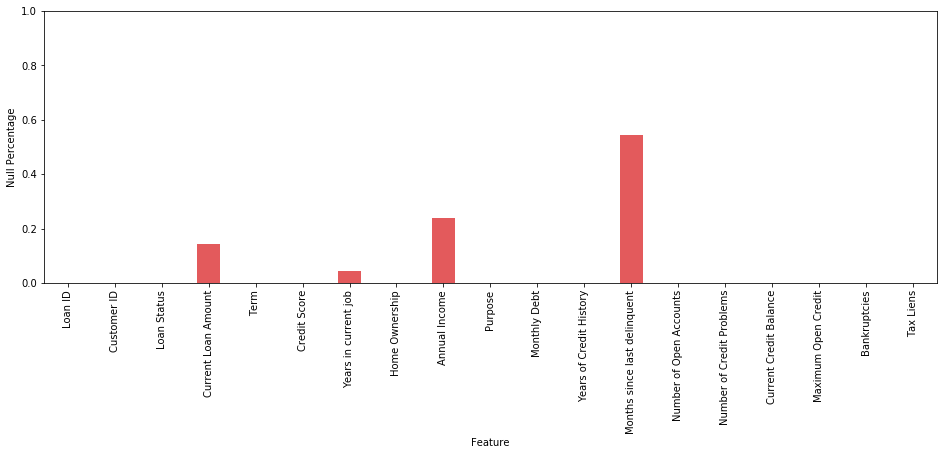

In [63]:
percentage_missing_data = loan_data.isnull().sum()/ len(loan_data)
print(percentage_missing_data[percentage_missing_data>0])
axis = percentage_missing_data.plot(kind="bar", color="#E35A5C", figsize=(16,5))
axis.set_xlabel("Feature")
axis.set_ylabel("Null Percentage")
axis.set_ylim(0,1)
plt.show();

* Remove column Months.since.last.delinquent

In [64]:
loan_data= loan_data.drop('Months since last delinquent',axis=1)
len(loan_data.columns)

18

### Mice Imputation for Remaining Columns

In [65]:
from sklearn.preprocessing import Imputer

In [66]:
imputer=Imputer()

In [67]:
catvars=['Loan ID','Customer ID','Loan Status','Term','Years in current job','Home Ownership','Purpose']
newdata = loan_data.copy()
newdata= newdata.drop(catvars,axis=1)
X=newdata

In [68]:
X.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,12232.0,728.0,10.750278,777.39,18.0,12.0,0,82.231381,89.140339,0.0,0.0
1,25014.0,733.0,11.303426,892.09,26.7,14.0,0,188.960313,279.214971,0.0,0.0
2,16117.0,724.0,11.009373,1244.02,16.7,11.0,1,106.183803,121.716885,1.0,0.0
3,11716.0,740.0,10.439133,990.94,10.0,21.0,0,83.719771,208.645633,0.0,0.0
4,9789.0,686.0,10.757967,503.71,16.7,13.0,1,130.049990,139.832042,1.0,0.0


In [69]:
new_values=imputer.fit_transform(X)
new_values[10:]

array([[1.98380000e+04, 7.01000000e+02, 1.12816489e+01, ...,
        1.50036662e+02, 0.00000000e+00, 0.00000000e+00],
       [1.83920000e+04, 7.31000000e+02, 1.07135062e+01, ...,
        1.08397417e+02, 0.00000000e+00, 0.00000000e+00],
       [2.94960000e+04, 6.85000000e+02, 1.12475266e+01, ...,
        2.11662467e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.43940000e+04, 7.46000000e+02, 1.11725175e+01, ...,
        2.31028137e+02, 0.00000000e+00, 0.00000000e+00],
       [5.03000000e+03, 7.22000000e+02, 1.01434489e+01, ...,
        1.35727669e+02, 0.00000000e+00, 0.00000000e+00],
       [1.84460000e+04, 7.18000000e+02, 1.06934438e+01, ...,
        1.45340978e+02, 0.00000000e+00, 1.00000000e+00]])

In [70]:
new_values=imputer.fit_transform(X)

In [71]:
#Result of imputer class is array , we need to convert it into data frame
new_dataset=pd.Dataset=pd.DataFrame(new_values)
new_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,12232.0,728.0,10.750278,777.39,18.0,12.0,0.0,82.231381,89.140339,0.0,0.0
1,25014.0,733.0,11.303426,892.09,26.7,14.0,0.0,188.960313,279.214971,0.0,0.0
2,16117.0,724.0,11.009373,1244.02,16.7,11.0,1.0,106.183803,121.716885,1.0,0.0
3,11716.0,740.0,10.439133,990.94,10.0,21.0,0.0,83.719771,208.645633,0.0,0.0
4,9789.0,686.0,10.757967,503.71,16.7,13.0,1.0,130.049990,139.832042,1.0,0.0


* Assign orginal names to columns

In [72]:
new_dataset.columns=X.columns

In [73]:
new_dataset.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,12232.0,728.0,10.750278,777.39,18.0,12.0,0.0,82.231381,89.140339,0.0,0.0
1,25014.0,733.0,11.303426,892.09,26.7,14.0,0.0,188.960313,279.214971,0.0,0.0
2,16117.0,724.0,11.009373,1244.02,16.7,11.0,1.0,106.183803,121.716885,1.0,0.0
3,11716.0,740.0,10.439133,990.94,10.0,21.0,0.0,83.719771,208.645633,0.0,0.0
4,9789.0,686.0,10.757967,503.71,16.7,13.0,1.0,130.049990,139.832042,1.0,0.0


In [74]:
A=loan_data[catvars]
B=new_dataset
loan_data = pd.concat([A,B],axis=1)

In [75]:
percentage_missing_data = loan_data.isnull().sum()/ len(loan_data)
print(percentage_missing_data[percentage_missing_data>0])

Years in current job    0.042931
dtype: float64


* Now only one column is having NAs i.e Years in current job approx 4%

In [76]:
loan_data['Years in current job'].value_counts()

10+ years    27410
2 years       8187
< 1 year      7312
3 years       7263
5 years       6084
1 year        5765
4 years       5474
6 years       5095
7 years       4943
8 years       4098
9 years       3462
Name: Years in current job, dtype: int64

* Replace NA with most frequent value i.e 10+ years.

In [77]:
loan_data['Years in current job'].unique()

array(['< 1 year', '10+ years', '9 years', '3 years', '2 years',
       '7 years', '6 years', '1 year', '5 years', '4 years', '8 years',
       nan], dtype=object)

In [78]:
loan_data['Years in current job'] = loan_data['Years in current job'].replace(np.nan,'10+ years')

In [79]:
corr_matrix  = loan_data.corr()
corr_matrix

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.175566,0.391838,0.411847,0.139317,0.188326,-0.065921,0.409173,0.373355,-0.090958,0.019612
Credit Score,-0.175566,1.000000,0.016946,-0.079846,0.074072,-0.025606,-0.045631,-0.018528,0.114834,-0.034054,-0.020432
Annual Income,0.391838,0.016946,1.000000,0.531613,0.192614,0.205555,-0.017084,0.355517,0.348814,-0.050544,0.040035
Monthly Debt,0.411847,-0.079846,0.531613,1.000000,0.193092,0.427699,-0.054355,0.542039,0.425670,-0.080385,0.021074
Years of Credit History,0.139317,0.074072,0.192614,0.193092,1.000000,0.130077,0.061496,0.251876,0.278493,0.064039,0.020706
Number of Open Accounts,0.188326,-0.025606,0.205555,0.427699,0.130077,1.000000,-0.014066,0.341140,0.454057,-0.024911,0.008125
Number of Credit Problems,-0.065921,-0.045631,-0.017084,-0.054355,0.061496,-0.014066,1.000000,-0.158568,-0.139157,0.750859,0.589512
Current Credit Balance,0.409173,-0.018528,0.355517,0.542039,0.251876,0.341140,-0.158568,1.000000,0.779459,-0.173074,-0.020944
Maximum Open Credit,0.373355,0.114834,0.348814,0.425670,0.278493,0.454057,-0.139157,0.779459,1.000000,-0.152809,-0.016371
Bankruptcies,-0.090958,-0.034054,-0.050544,-0.080385,0.064039,-0.024911,0.750859,-0.173074,-0.152809,1.000000,0.046089


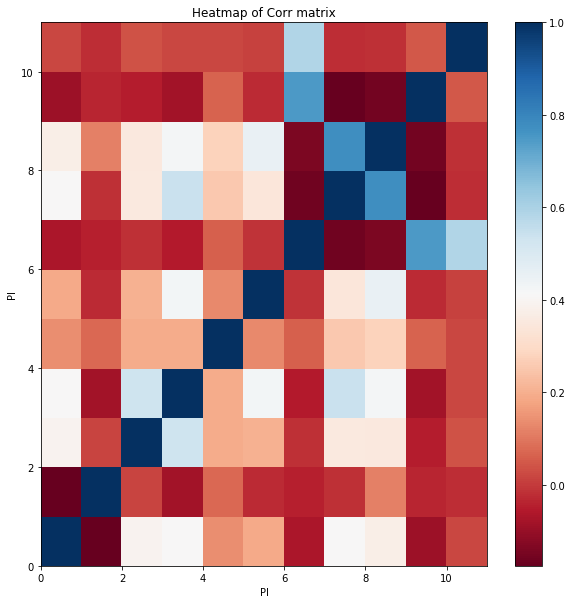

In [80]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_matrix, cmap="RdBu")
plt.xlabel("PI")
plt.ylabel("PI")
plt.title("Heatmap of Corr matrix")
plt.colorbar()
plt.show()

In [81]:
sort = corr_matrix.abs().unstack()
sort = sort.sort_values(kind="quicksort", ascending=False)
sort[(sort>0.6) & (sort<1)]

Maximum Open Credit        Current Credit Balance       0.779459
Current Credit Balance     Maximum Open Credit          0.779459
Number of Credit Problems  Bankruptcies                 0.750859
Bankruptcies               Number of Credit Problems    0.750859
dtype: float64

### 1-HOT Encoding of Categorical variables.

In [82]:
Dummies

['Term', 'Years in current job', 'Home Ownership', 'Purpose']

In [83]:
loan_data=pd.get_dummies(loan_data,columns=Dummies,drop_first=True)

In [84]:
loan_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232.0,728.0,10.750278,777.39,18.0,12.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014.0,733.0,11.303426,892.09,26.7,14.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117.0,724.0,11.009373,1244.02,16.7,11.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716.0,740.0,10.439133,990.94,10.0,21.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789.0,686.0,10.757967,503.71,16.7,13.0,1.0,...,1,0,0,0,0,0,0,0,0,0


### Train-Test Split

In [85]:
Y = loan_data["Loan Status"]
X=loan_data.drop(['Loan Status','Loan ID','Customer ID'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=88,stratify=Y)

In [86]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((62237, 38), (26673, 38), (62237,), (26673,))

In [87]:
loan_data["Loan Status"].value_counts()

Fully Paid     63737
Charged Off    25173
Name: Loan Status, dtype: int64

## Lets Begin Modelling.

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Logistic Regression

In [90]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
model.score(X_train,Y_train)

0.7165351800375982

In [101]:
Y_pred=model.predict(X_test)
Y_pred

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [97]:
confusion_matrix(Y_test,Y_pred)

array([[   33,  7519],
       [   27, 19094]], dtype=int64)

In [102]:
acc = accuracy_score(Y_test,Y_pred)
acc

0.7170921906047314

### Decision Trees

In [94]:
model2=DecisionTreeClassifier(max_depth=10)

In [95]:
model2.fit(X_train,Y_train)
model2.score(X_train,Y_train)

0.7612834808875749

In [98]:
Y_pred = model2.predict(X_test)

In [100]:
acc = accuracy_score(Y_test,Y_pred)
print("Accuarcy of Decision Trees  is {}".format(acc))
cfm = confusion_matrix(Y_test,Y_pred) #(actual vs predicted always)
print(cfm)
print("Classification Report for DT  is\n {}".format(classification_report(Y_test,Y_pred)))

Accuarcy of Decision Trees  is 0.7216661043002287
[[ 2134  5418]
 [ 2006 17115]]
Classification Report for DT  is
               precision    recall  f1-score   support

 Charged Off       0.52      0.28      0.37      7552
  Fully Paid       0.76      0.90      0.82     19121

   micro avg       0.72      0.72      0.72     26673
   macro avg       0.64      0.59      0.59     26673
weighted avg       0.69      0.72      0.69     26673



### Random Forests

* Apply cross validation

Best params :  {'max_depth': 11, 'max_features': 9}

In [114]:
model3 = RandomForestClassifier(n_estimators=200,max_depth=11,max_features=9,oob_score=True,verbose=1,random_state=50)

In [115]:
model3.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   24.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=True, random_state=50, verbose=1, warm_start=False)

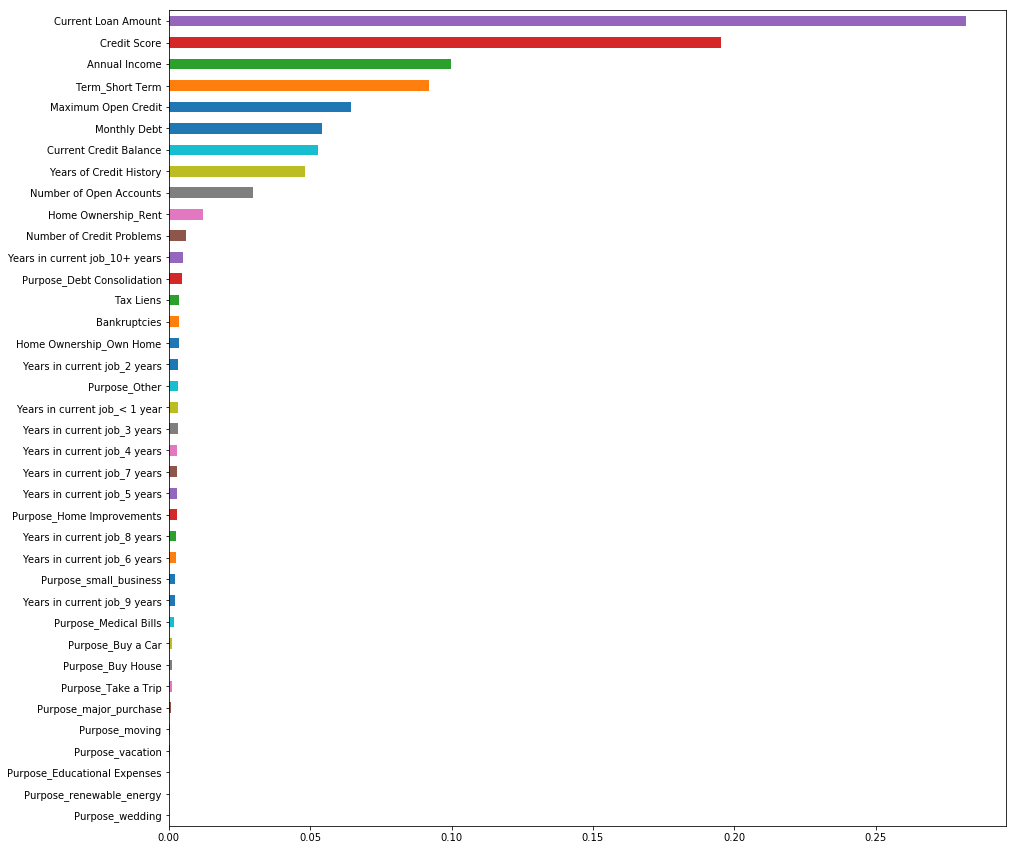

In [116]:
data=pd.Series(model3.feature_importances_,index=X_train.columns)
data=data.sort_values()
plt.figure(figsize=(15,15))
data.plot.barh()

In [117]:
model3.oob_score_

0.7348201230779119

In [119]:
y_pred=model3.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished


In [120]:
model3.score(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.7s finished


0.7717113614088082

In [121]:
acc = accuracy_score(Y_test,Y_pred)
acc

0.7170921906047314

### Xg Boost

In [123]:
param_grid = {'learning_rate': [0.1, 0.05], 'max_depth': [10, 11],'n_estimators': [100, 500, 900]}

In [124]:
# Instantiate the grid search model
xmodel = xgboost.XGBClassifier()
grid_search = GridSearchCV(estimator = xmodel,param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, )

* Python's Xgoost: ValueError('feature_names may not contain [, ] or <')

In [127]:
X_train.rename(columns={'Years in current job_< 1 year':'Years in current job less than 1'}, inplace=True)

In [128]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 44.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [10, 11], 'n_estimators': [100, 500, 900]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [129]:
grid_search.best_params_
#scoring = 'neg_median_absolute_error'

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100}

In [130]:
# Create the pipeline: Imputation + Scale + XGB Classifier
xmodel = make_pipeline(Imputer(), StandardScaler(), 
                                     xgboost.XGBClassifier(random_state = 50,
                                                  learning_rate = 0.05,
                                                  max_depth = 10,
                                                  n_estimators = 100))

# Fit the model
xmodel.fit(X_train, Y_train)
Y_pred = xmodel.predict(X_test)

In [132]:
Y_PredTrain = xmodel.predict(X_train)
acc = accuracy_score(Y_train,Y_PredTrain)
print("Accuarcy of XG Boost  is {}".format(acc))

Accuarcy of XG Boost  is 0.8243327923903787


In [137]:
acc = accuracy_score(Y_test,Y_pred)
print("Accuarcy of XG Boost  is {}".format(acc))
cfm = confusion_matrix(Y_test,Y_pred) #(actual vs predicted always)
print(cfm)
print("Confusion Matrix of XG Boost is\n {}".format(acc))
print("Classification Report for XG Boost  is\n {}".format(classification_report(Y_test,Y_pred)))

Accuarcy of XG Boost  is 0.7337757282645372
[[ 2077  5475]
 [ 1626 17495]]
Confusion Matrix of XG Boost is
 0.7337757282645372
Classification Report for XG Boost  is
               precision    recall  f1-score   support

 Charged Off       0.56      0.28      0.37      7552
  Fully Paid       0.76      0.91      0.83     19121

   micro avg       0.73      0.73      0.73     26673
   macro avg       0.66      0.59      0.60     26673
weighted avg       0.70      0.73      0.70     26673



## Final Conclusion ::: Boosting ( Accuracy : 0.82)

In [133]:
BestModel=xmodel

In [134]:
BestModel.score(X_train,Y_train)

0.8243327923903787

In [135]:
import joblib
joblib.dump(BestModel, "CreditRisk_model.h5")

['CreditRisk_model.h5']